# Week 1: Introduction to Data Quality and Data Wrangling (12.02.25)

In [ ]:
# Practical example of Data Wrangling using Python
import pandas as pd
import numpy as np

In [ ]:
#sample data
data ={
    "Name": ["Alice", "Bob", None, 'Diani'],
    "Age": [25, np.nan, 30, 45],
    "City": ["Lagos", "Arizona", "Indianapolis", None]
}
df = pd.DataFrame(data)

In [ ]:
# Display the initial data
print("### Sample Data")
df.head()

### Sample Data


Name   Age          City
0  Alice  25.0         Lagos
1    Bob   NaN       Arizona
2   None  30.0  Indianapolis
3  Diani  45.0          None

In [ ]:
# Example of data cleaning
# Calculate the average age
Avg_age = round(df["Age"].mean(),0)

df_cleaned = df.fillna({"City": "Unknown", "Age":Avg_age}).dropna()

print("### Cleaned Data")
df_cleaned

### Cleaned Data


Name   Age     City
0  Alice  25.0    Lagos
1    Bob  33.0  Arizona
3  Diani  45.0  Unknown

In [ ]:
# Simple code to check for missing or incomplete data fields

import pandas as pd


In [ ]:
# Example Dataset

data = {
    'Math_Score': [88, 90, None, 85],
    'Science_Score': [78, None, 80, 88]
}

df = pd.DataFrame(data)

In [ ]:
print(df.isnull())

   Math_Score  Science_Score
0       False          False
1       False           True
2        True          False
3       False          False


# Week 2: Introduction to Python for Data Cleaning and Augmentation (12.02.25)

In [ ]:
# Variables: These represent data values

# Demonstrating variables in code
name = "Solomon"
age = 28
height = 6.0

print("Name:", name)
print("age:", age)
print("Height:", height)

Name: Solomon
age: 28
Height: 6.0


In [ ]:
#Functions: These perform actions

# simple functions example
def greet(name):
    return f"Hello, {name}!"

print(greet("Alice"))
greet("Clinton")

Hello, Alice!


'Hello, Clinton!'

In [ ]:
# Function to calculate the square of a number

def square(number):
    return f"{number} square is {number ** 2}"

print (square(2))
square(10)

2 square is 4


'10 square is 100'

In [ ]:
# Borrowing functions with libraries

#using libraries like math
import math
print('Square root of 16 is =', math.sqrt(16))
math.factorial(10)

Square root of 16 is = 4.0


3628800

In [ ]:
#Control structures and error handling

#Loops and conditionals
#loops: repeat codes (e.g for, while)
#conditionals execute code based on conditions (e.g. if , else)

# Example: a loop with a condition
for i in range (5):
    if i % 2 ==0:
        print(f"{i} is even")
    else:
        print(f"{i} is odd")

0 is even
1 is odd
2 is even
3 is odd
4 is even


In [ ]:
# Error handling

try:
    result = 10/0
except ZeroDivisionError:
    print("cannot divid by zero.")

cannot divid by zero.


In [ ]:
#syntax errors

#missing parenthesis in the pint statement
print("hello, world!"

SyntaxError: incomplete input (4286741783.py, line 4)

In [ ]:
#identation error

#improper identation
def greet():
print("hello, wold!")

IndentationError: expected an indented block after function definition on line 4 (3909269987.py, line 5)

In [ ]:
#Name Error

#using an undefined variable
print(my_variable)

NameError: name 'my_variable' is not defined

In [ ]:
#Type Error

# Trying to concatenate a string and an integer
age = 28
print("my age is" + age)

TypeError: can only concatenate str (not "int") to str

In [ ]:
#Index Error

# Accessing an out-of-range index
numbers = [1,2,3]
print(numbers[5])

IndexError: list index out of range

In [ ]:
#Key Error

# Accessing a non-existent key in a dictionary
person = {
    "name": "Alice",
    "age":25
}

print(person["gender"])

KeyError: 'gender'

In [ ]:
#Attribute Error

#Trying to use a non-existent method
number = 5
number.append(10)

AttributeError: 'int' object has no attribute 'append'

In [ ]:
#Value Error

# Trying to convert an invalid string to an integer
number = int("Hello")

ValueError: invalid literal for int() with base 10: 'Hello'

In [ ]:
#ZeroDivisionError

#Division by zero
result = 10/0

ZeroDivisionError: division by zero

In [ ]:
#Import Error

#Trying to import a non-existing module
import non_existent_module

ModuleNotFoundError: No module named 'non_existent_module'

### Techniques for Improving Data Quality and data Augmentation

#### Handling Missing Data

In [ ]:
'''
Removing missing values: if a row or column has too many missing values, they can be dropped. Say 80% missing value
Imputation: Filling in missing data using various strategies such as the mean, median or most frequent value.
    - if the columns are numerical consider filling with a MEAN. If there are no outliers in that columns
    - if there are outliers and normalization of those values are not required then fill with MEDIAN
    - if there data are categorical fill missing values with the MODE(most frequent value)
Foward/Backward Fill: Filling missing values based on the preceding or succeeding data points in time-series data.
'''

import pandas as pd
from sklearn.impute import SimpleImputer

## To create a sample dataset with missing values...
data = {
    'Age': [25, 30, None, 22, 29],
    'Income': [50000, 60000, 45000, None, 70000]
}
df = pd.DataFrame(data)

## Display the original dataset
print("Original Data:")
print(df)

Original Data:
    Age   Income
0  25.0  50000.0
1  30.0  60000.0
2   NaN  45000.0
3  22.0      NaN
4  29.0  70000.0


In [ ]:
# Method 1: Dropping Missing values
df_dropped = df.dropna()
print("\nData after dropping missing values:")
print(df_dropped)


Data after dropping missing values:
    Age   Income
0  25.0  50000.0
1  30.0  60000.0
4  29.0  70000.0


In [ ]:
# Method 2: Imputing missing values with the mean
imputer = SimpleImputer(strategy = 'mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print ("\nData after imputation (mean):")
print(df_imputed)


Data after imputation (mean):
    Age   Income
0  25.0  50000.0
1  30.0  60000.0
2  26.5  45000.0
3  22.0  56250.0
4  29.0  70000.0


#### Handling Outliers

In [ ]:
'''
Removing outliers: Outliers are discarded if they are identified as erroneous
Capping and Flooring: Limiting extreme avlues by setting thresholds
'''

#Example

import numpy as np

#sample dataset with outliers
data = {
    'Age': [22, 25, 26, 30, 100],
    'Income': [30000, 35000, 40000, 50000, 200000]
}
df = pd.DataFrame(data)
print (df)

   Age  Income
0   22   30000
1   25   35000
2   26   40000
3   30   50000
4  100  200000


In [ ]:
# Identifying outliers based on thresholds
age_threshold = 90
df['Age'] = np.where(df['Age'] > age_threshold, age_threshold, df['Age'])
df

Age  Income
0   22   30000
1   25   35000
2   26   40000
3   30   50000
4   90  200000

### Normalisation and Standardisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data ={
    'Income': [50000, 60000, 45000, 70000, 80000]
}
df = pd.DataFrame(data)
df

Income
0   50000
1   60000
2   45000
3   70000
4   80000

In [ ]:
# Normalising data

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Data after normalisation:", "\n", df_scaled)

Data after normalisation: 
      Income
0  0.142857
1  0.428571
2  0.000000
3  0.714286
4  1.000000


#### Consistency Checks

In [ ]:
#Example: Consistency check for date formats

#sample dataset with inconsistent date formates

data ={
    'Date': ['2024-10-01', '01/10/2024', '2024.10.01']
}
df = pd.DataFrame(data)
df

Date
0  2024-10-01
1  01/10/2024
2  2024.10.01

In [ ]:
#convert all dates to a standard format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format='mixed')
print("Date after consistend date formatting: \n", df)

Date after consistend date formatting: 
         Date
0 2024-10-01
1 2024-10-01
2 2024-10-01


#### Data Augmentation

In [ ]:
#pip install tensorflow numpy matplotlib requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 277.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 761.3 kB/s eta 0:00:000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 602.7 kB/s eta 0:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import other necessary modules
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [ ]:
# Load a sample image
#image_url = "https://th-thumbnailer.cdn-si-edu.com/bgmkh2ypz03IkiRR50I-UMaqUQC=/1000x750/filters:no_upscale():focal(1061x707:1062x708)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer_public/55/95/55958815-3a8a-4032-ac7a-ff8c8ec8898a/gettyimages-1067956982.jpg"

image_url ="https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer_public/55/95/55958815-3a8a-4032-ac7a-ff8c8ec8898a/gettyimages-1067956982.jpg"

# Fetch the image from the URL
response = requests.get(image_url, stream=True)
response.raise_for_status() # Raise an exception for bad responses (like 404)
img = image.load_img(BytesIO(response.content))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Image augmentation generator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

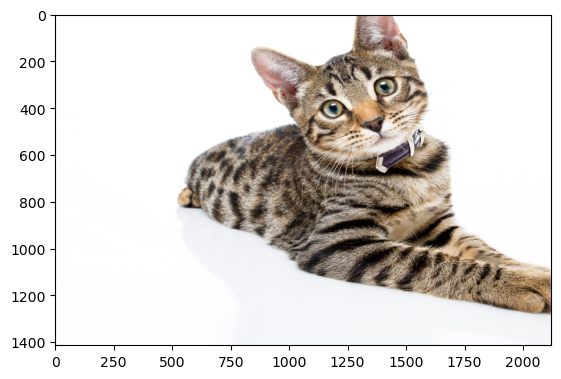

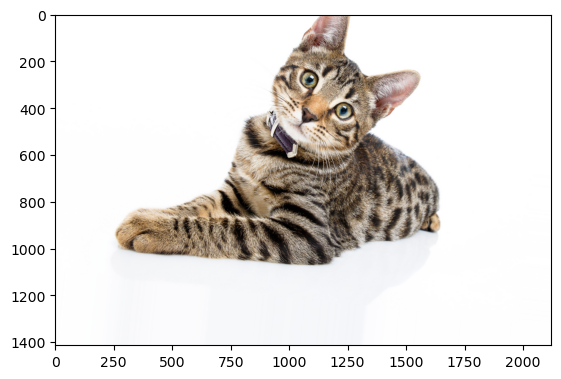

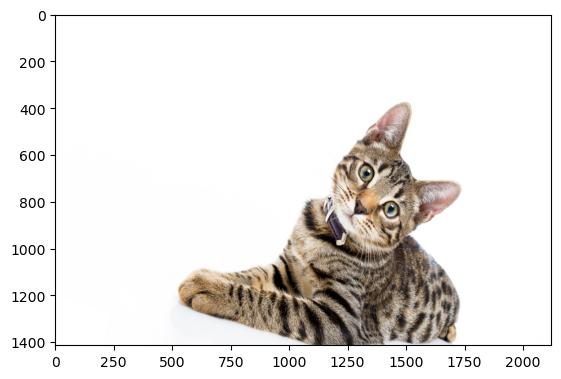

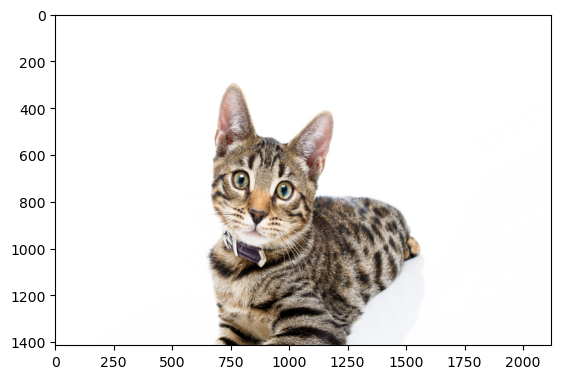

In [ ]:
# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt. figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

#### Text Data Augmentation

In [ ]:
import random
import nltk
from nltk.corpus import wordnet

# Download the 'wordnet' resource
nltk.download('wordnet')

# Function to replace a word with its synonym
def get_synonyms (word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

def synonym_replacement(text):
    words = text.split()
    new_words = []
    for word in words:
        synonyms = get_synonyms (word)
        if synonyms:
            new_words.append(random.choice(synonyms))
        else:
            new_words.append (word)
    return ' '.join(new_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/solomonayuba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Accessing Data from Web Sources

In [ ]:
# Example: Downloading XML data from a URL
import requests

#URL of the XML data
xml_url = 'https://feeds.bbci.co.uk/news/science_and_environment/rss.xml'

# Accessing the data
response = requests.get(xml_url)

# Saving the XML data to a file
with open('bbc_rss.xml', 'w') as file:
    file.write(response.text)

print("XML data saved")

XML data saved


In [ ]:
# Example: Downloading JSON data
import requests

#URL of the JSON data
json_url = 'https://gbfs.citibikenyc.com/gbfs/en/station_status.json'

# Accessing the data
response = requests.get(json_url)

# Saving the JSON data to a file
with open('citibike_data.json', 'w') as file:
    file.write(response.text)

print("JSON data saved")

JSON data saved


In [ ]:
# Web Scraping

import requests
from bs4 import BeautifulSoup

#URL of the webpage
url = 'https://www.iana.org/domains/example'
#url = 'https://netflare.com.ng'
#url = 'https://cielo-amsterdam.com'

#accessing the webpage
response = requests.get(url)

#parsing the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

#Extracting specific data(e.g., all links)
links = soup.find_all('a')

for link in links:
    print(link.get('href'))

/
/domains
/protocols
/numbers
/about
/go/rfc2606
/go/rfc6761
/domains/reserved
/domains
/domains/root
/domains/int
/domains/arpa
/domains/idn-tables
/numbers
/abuse
/protocols
/protocols
/time-zones
/about
/news
/performance
/about/excellence
/archive
/contact
http://pti.icann.org
http://www.icann.org/
https://www.icann.org/privacy/policy
https://www.icann.org/privacy/tos


#### Worksheet

In [ ]:
x = 10
y = "12"
print(x+int(y))

#Division(/)
a = 10
b = 3
result = a / b
print("Division result:", result)

#Floor Division(//)
quotient = a // b
print("Quotient (floor division):", quotient)

#Division with remainder(%)
remainder = a % b
print("Remainder:", remainder)

#using divmod() (both quotient and remainder)
quotient, remainder = divmod(a, b)
print("Quotient:", quotient)
print("Remainder:", remainder)

22
Division result: 3.3333333333333335
Quotient (floor division): 3
Remainder: 1
Quotient: 3
Remainder: 1


In [ ]:
'''
Write a code snippet that takes an integer variable marks and
prints:
A. "Pass" if marks is 40 or above.
B. "Fail" if marks is below 40.
'''

marks = int(input("Enter your marks: "))

if marks >=40:
    print("Pass")
else:
    print("Fail")

Enter your marks:  89


Pass
Passx


In [ ]:
# Write a for loop in Python that prints numbers from 1 to 5

for i in range(1,6):
    print(i)

1
2
3
4
5


In [ ]:
#a while loop that prints "Hello!" three times.

count = 0
while count < 3:
    print("Hello!")
    count += 1

Hello!
Hello!
Hello!


In [ ]:
for i in range(3):
    print (i)

0
1
2


In [ ]:
def greet(name):
    return f"hello, {name}!"

print(greet("ola"))

hello, ola!


In [ ]:
def multiply_numbers(x,y):
    return x*y

## Peer to Peer

In [ ]:
# Question

'''
Using Python,
    - write a script that reads a dataset (CSV or JSON),
    - performs basic cleaning operations (e.g., handling missing values and ensuring consistent formatting),
    and outputs a summary of the dataset's quality (e.g., count of missing values, data types, and duplicates).
'''

In [ ]:
import pandas as pd

# Step 1: Load the dataset from the Google Drive link
url = "https://drive.google.com/uc?export=download&id=1W8BXPVlTOL3ehDSRZ0ZeXXq-dFWCvUT5"
df = pd.read_csv(url)

# Step 2: Perform basic cleaning operations

# Handle missing values (fill with a placeholder or drop rows/columns)
df_cleaned = df.fillna("Unknown")  # Replace missing values with "Unknown"


# Step 3: Output a summary of the dataset's quality

# Count of missing values
missing_values = df.isnull().sum()

# Data types of columns
data_types = df.dtypes

# Count of duplicate rows
duplicate_rows = df.duplicated().sum()

# Step 4: Print the summary
print("=== Dataset Quality Summary ===")
print("\n1. Missing Values:")
print(missing_values)

print("\n2. Data Types:")
print(data_types)

print("\n3. Duplicate Rows:")
print(f"Number of duplicate rows: {duplicate_rows}")

print("\n4. First 5 Rows of Cleaned Dataset:")
print(df_cleaned.head())

=== Dataset Quality Summary ===

1. Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

2. Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

3. Duplicate Rows:
Number of duplicate rows: 0

4. First 5 Rows of Cleaned Dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             maste

# Week 3: Understanding Data Quality, Data Manipulation and Transformation (13.02.25)

#### Validity and Reliability

In [ ]:
pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 111.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import kagglehub

#Download the latest version
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")
print("Path to dataset files:", path)

100%|██████████| 72.9M/72.9M [01:04<00:00, 1.18MB/s]

Extracting files...


Path to dataset files: /Users/solomonayuba/.cache/kagglehub/datasets/rohanrao/air-quality-data-in-india/versions/12


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# Specify the dataset path
dataset_path = "/Users/solomonayuba/.cache/kagglehub/datasets/rohanrao/air-quality-data-in-india/versions/12"

# List all CSV files in the directory
csv_files = [file for file in os.listdir(dataset_path) if file.endswith(".csv")]
print("CSV Files:", csv_files)

# Dictionary to store each DataFrame
dataframes = {}

# Iterate through the list of CSV files and load each into a DataFrame
for file_name in csv_files:
    file_path = os.path.join(dataset_path, file_name)
    df = pd.read_csv(file_path)
    dataframes[file_name] = df
    print(f"Loaded {file_name} with {df.shape[0]} rows and {df.shape[1]} columns")

CSV Files: ['station_day.csv', 'city_hour.csv', 'city_day.csv', 'stations.csv', 'station_hour.csv']
Loaded station_day.csv with 108035 rows and 16 columns
Loaded city_hour.csv with 707875 rows and 16 columns
Loaded city_day.csv with 29531 rows and 16 columns
Loaded stations.csv with 230 rows and 5 columns
Loaded station_hour.csv with 2589083 rows and 16 columns


/var/folders/7r/mcmmfgh935sf00ct7lyq7bxr0000gn/T/ipykernel_95436/2246872563.py:14: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
#
station_day = dataframes['station_day.csv']
city_day = dataframes['city_day.csv']
city_hour = dataframes['city_hour.csv']
station_hour = dataframes['station_hour.csv']
stations = dataframes['stations.csv']

# Display the first few rows of one of the DataFrames
station_day.head()

StationId        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0     AP001  2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1     AP001  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2     AP001  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3     AP001  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4     AP001  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  10.76  109.26     0.17     5.92    0.10    NaN        NaN  
1  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  
2  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  
3  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  
4  19.00  138.18     0.17     5.02    0.07  188.0   Moderate

In [ ]:
city_day.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [ ]:
city_hour.head()

City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN

In [ ]:
station_hour.head()

StationId             Datetime  PM2.5    PM10    NO    NO2    NOx    NH3  \
0     AP001  2017-11-24 17:00:00  60.50   98.00  2.35  30.80  18.25   8.50   
1     AP001  2017-11-24 18:00:00  65.50  111.25  2.70  24.20  15.07   9.77   
2     AP001  2017-11-24 19:00:00  80.00  132.00  2.10  25.18  15.15  12.02   
3     AP001  2017-11-24 20:00:00  81.50  133.25  1.95  16.25  10.23  11.58   
4     AP001  2017-11-24 21:00:00  75.25  116.00  1.43  17.48  10.43  12.03   

    CO    SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  0.1  11.85  126.40      0.1     6.10    0.10  NaN        NaN  
1  0.1  13.17  117.12      0.1     6.25    0.15  NaN        NaN  
2  0.1  12.08   98.98      0.2     5.98    0.18  NaN        NaN  
3  0.1  10.47  112.20      0.2     6.72    0.10  NaN        NaN  
4  0.1   9.12  106.35      0.2     5.75    0.08  NaN        NaN

In [ ]:
stations.head()

StationId                                     StationName  \
0     AP001                  Secretariat, Amaravati - APPCB   
1     AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2     AP003                      Tirumala, Tirupati - APPCB   
3     AP004                 PWD Grounds, Vijayawada - APPCB   
4     AP005          GVM Corporation, Visakhapatnam - APPCB   

                City           State  Status  
0          Amaravati  Andhra Pradesh  Active  
1  Rajamahendravaram  Andhra Pradesh     NaN  
2           Tirupati  Andhra Pradesh     NaN  
3         Vijayawada  Andhra Pradesh     NaN  
4      Visakhapatnam  Andhra Pradesh  Active

In [ ]:
# 1. Assessing Validity of Timestamps
# Check if 'date' column exists and is in the correct format
dataset_list = [station_day, city_day, city_hour, station_hour, stations]
dataset_with_date = []
dataset_without_date = []

for dataset in dataset_list:
    if 'Date' in dataset.columns:
        try:
            dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
            invalid_dates = dataset['Date'].isnull().sum()
            print(f"Number of invalid dates: {invalid_dates}")
            dataset_with_date.append(dataset)
        except Exception as e:
            print("Error in parsing date column:", e)
        else:
            print("'date' column not found in the dataset.")
            dataset_without_date.append(dataset)

Number of invalid dates: 0
'date' column not found in the dataset.
Number of invalid dates: 0
'date' column not found in the dataset.


In [ ]:
stations.head()

StationId                                     StationName  \
0     AP001                  Secretariat, Amaravati - APPCB   
1     AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2     AP003                      Tirumala, Tirupati - APPCB   
3     AP004                 PWD Grounds, Vijayawada - APPCB   
4     AP005          GVM Corporation, Visakhapatnam - APPCB   

                City           State  Status  
0          Amaravati  Andhra Pradesh  Active  
1  Rajamahendravaram  Andhra Pradesh     NaN  
2           Tirupati  Andhra Pradesh     NaN  
3         Vijayawada  Andhra Pradesh     NaN  
4      Visakhapatnam  Andhra Pradesh  Active

In [ ]:
# 2. Assessing Validity of Categorical Values
# Known list of valid cities
url = "https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population"
cities = pd.read_html(url)

cities

[                City  Population (2011)[3]  Population (2001)[3][a]  \
 0             Mumbai              12442373                 11978450   
 1              Delhi              11034555                  9879172   
 2          Bangalore               8443675                  5682293   
 3          Hyderabad               6993262                  5496960   
 4          Ahmedabad               5577940                  4470006   
 5            Chennai               4646732                  4343645   
 6            Kolkata               4496694                  4580546   
 7              Surat               4467797                  2788126   
 8               Pune               3124458                  2538473   
 9             Jaipur               3046163                  2322575   
 10           Lucknow               2817105                  2185927   
 11            Kanpur               2765348                  2551337   
 12            Nagpur               2405665                  205

In [ ]:
cities1 = cities[0]["City"]
cities2 = cities[1]["City"]
valid_cities = pd.concat([cities1, cities2]).reset_index(drop=True)
valid_cities.head()

0       Mumbai
1        Delhi
2    Bangalore
3    Hyderabad
4    Ahmedabad
Name: City, dtype: object

In [ ]:
# Display rows where the 'City' column contains numbers in square brackets
cities_with_numbers = valid_cities[valid_cities.str.contains(r"\[\d+\]", regex=True)]
cities_with_numbers

50      Tiruchirappalli[6]
61             Warangal[7]
63               Guntur[8]
75              Nellore[9]
95               Erode[10]
108    Rajahmundry[11][12]
121           Tirupati[13]
195         Ramagundam[16]
232           Chittoor[17]
Name: City, dtype: object

In [ ]:
# Use regex to remove any text inside square brackets, including the brackets
valid_cities = valid_cities.str.replace(r"\[\d+\]","", regex=True)

# Optional: Remove any extra spaces
valid_cities = valid_cities.str.strip()
cities_still_with_numbers = []

for city in valid_cities:
    if city in cities_with_numbers:
        cities_still_with_numbers.append(city)
        print(f"The number of cities that still have numbers after the cleaning process is {len(cities_still_with_numbers)}")

NameError: name 'valid_cities' is not defined

In [ ]:
# Refer to course PDF material for further coding exercises

#### Data Joining, Reshaping, and Visualisation

In [ ]:
import pandas as pd

#create two datasets
data_sales = {
    'ID': [101, 102, 103, 104],
    'Product': ['A', 'B', 'C', 'D'],
    'Sales': [250, 150, 200, 300]
}
df_sales = pd.DataFrame(data_sales)
df_sales

ID Product  Sales
0  101       A    250
1  102       B    150
2  103       C    200
3  104       D    300

In [ ]:
data_cost = {
    'ID': [101, 102, 103, 104],
    'Product': ['A','B','C','E'],
    'Cost': [180, 120, 140, 220]
}
df_cost = pd.DataFrame(data_cost)
df_cost

ID Product  Cost
0  101       A   180
1  102       B   120
2  103       C   140
3  104       E   220

In [ ]:
# Perform an inner merge on 'ID' Column
df_merged = pd.merge(df_sales, df_cost, on='ID', how='inner')
print("Merged DataFrame ")
df_merged

Merged DataFrame 


ID Product_x  Sales Product_y  Cost
0  101         A    250         A   180
1  102         B    150         B   120
2  103         C    200         C   140
3  104         D    300         E   220

In [ ]:
# Perform an left merge on 'ID' Column
df_merged_left = pd.merge(df_sales, df_cost, on='ID', how='left')
print("Merged DataFrame ")
df_merged_left

Merged DataFrame 


ID Product_x  Sales Product_y  Cost
0  101         A    250         A   180
1  102         B    150         B   120
2  103         C    200         C   140
3  104         D    300         E   220

### Concatenating Datasets


In [ ]:
# concatenating two datasets verticall
df_concatenated = pd.concat([df_sales, df_cost], axis=0)
print("\nConcatenated DataFrame (Vertical):")
df_concatenated


Concatenated DataFrame (Vertical):


ID Product  Sales   Cost
0  101       A  250.0    NaN
1  102       B  150.0    NaN
2  103       C  200.0    NaN
3  104       D  300.0    NaN
0  101       A    NaN  180.0
1  102       B    NaN  120.0
2  103       C    NaN  140.0
3  104       E    NaN  220.0

### Reshaping and Pivoting

In [ ]:
data_sales_long = {
    'Month': ['Jan', 'Jan', 'Feb', 'Feb'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [200, 150, 300, 100]
}
df_long = pd.DataFrame(data_sales_long)
df_long

Month Product  Sales
0   Jan       A    200
1   Jan       B    150
2   Feb       A    300
3   Feb       B    100

In [ ]:
# Pivot the Dataframe
df_pivot = df_long.pivot(index='Month', columns = 'Product', values='Sales')

print("\nPivoted DataFrame:")
df_pivot


Pivoted DataFrame:


Product    A    B
Month            
Feb      300  100
Jan      200  150

### Stacking and Unstacking

In [ ]:
# stack the pivoted DataFrame
df_stacked = df_pivot.stack()

print("\nStacked DataFrame:")
df_stacked


Stacked DataFrame:


Month  Product
Feb    A          300
       B          100
Jan    A          200
       B          150
dtype: int64

In [ ]:
# stack the pivoted DataFrame
df_unstacked = df_pivot.unstack()

print("\nUnstacked DataFrame:")
df_unstacked


Stacked DataFrame:


Product  Month
A        Feb      300
         Jan      200
B        Feb      100
         Jan      150
dtype: int64

### Data Visualisation

In [ ]:
#Line Plot using Matplotlib

import matplotlib.pyplot as plt

# Sample data for visualisation
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales = [200, 250, 300, 350, 400]

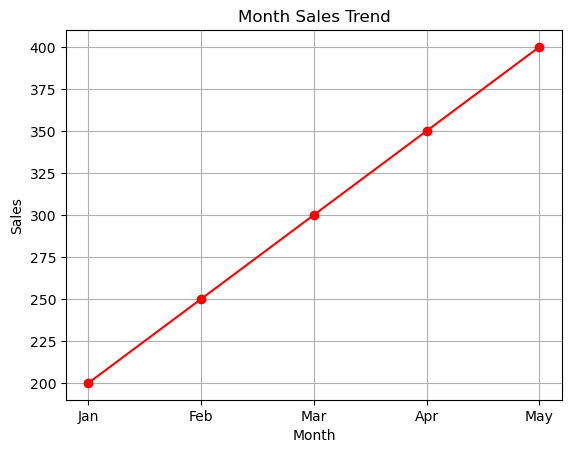

In [ ]:
# Create a line plot
plt.plot(months, sales, marker='o', color='r')
plt.title('Month Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Creating Bar Charts

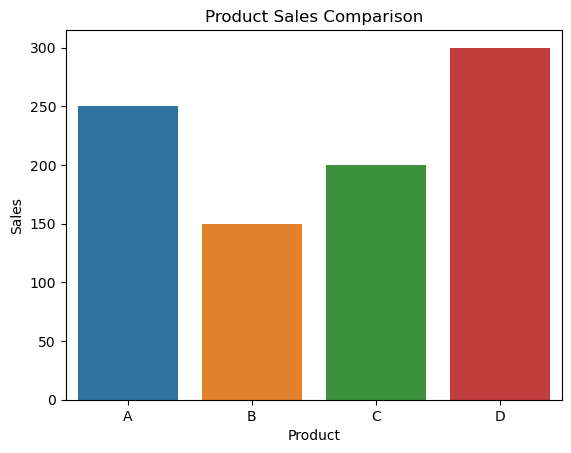

In [ ]:
# Bar Chart Using Seaborn

import seaborn as sns

# Create bar chart for sales by product
sns.barplot(x='Product', y='Sales', data=df_sales)
plt.title('Product Sales Comparison')
plt.show()

### Heatmaps

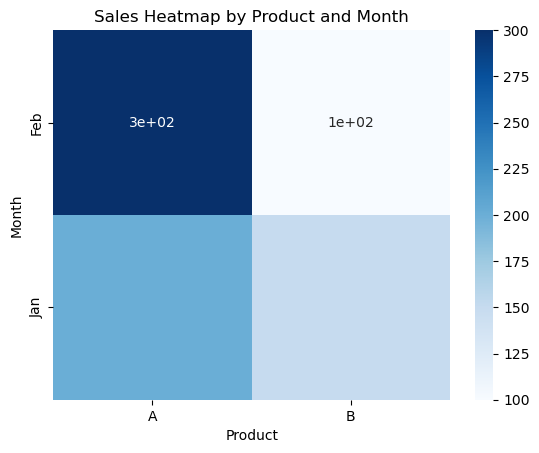

In [ ]:
# Heatmap using Seaborn

#Create a heatmap of the pivoted sales data
sns.heatmap(df_pivot, annot=True, cmap='Blues')
plt.title('Sales Heatmap by Product and Month')
plt.show()

## Worksheet

In [ ]:
pivot_question  = df_long.pivot(index = 'Date', columns = 'Region', values = 'Sales')
print("answer:")
pivot_question

In [ ]:
pd.melt(df, id_vars=['Year'], var_name='Product', value_name='Sales')

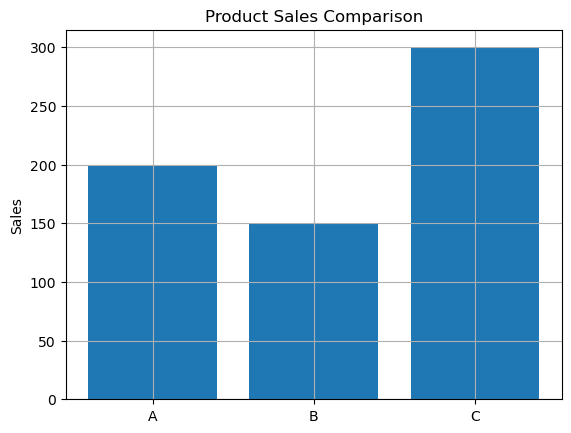

In [ ]:
import matplotlib.pyplot as plt
product = ['A', 'B', 'C']
value = [200, 150, 300]

#plt.bar(['A','B','C'],[200, 150, 300])
plt.bar(product, value)
plt.title("Product Sales Comparison")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

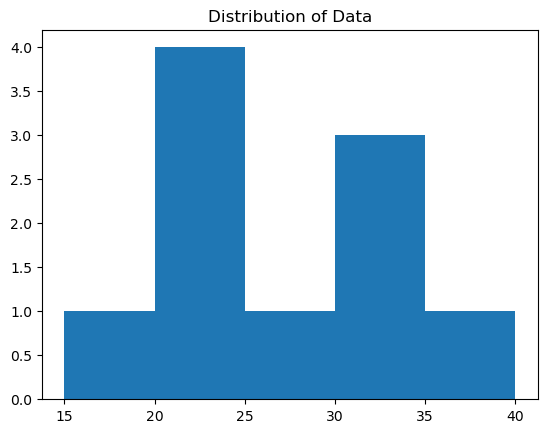

In [ ]:
import matplotlib.pyplot as plt

data = [15, 20, 21, 22, 20, 25, 30, 32, 30,40]

plt.hist(data, bins=5)
plt.title("Distribution of Data")
plt.show()



# Week 4: Data Analysis with Python Libraries (15.02.25)

### Broadcasting in Numpy

In [ ]:
import numpy as np
# Broadcasting example
A = np.array([1, 2, 3])
B = np.array([[10], [20], [30]])
A, B

(array([1, 2, 3]),
 array([[10],
        [20],
        [30]]))

In [ ]:
# Broadcasting in action
result = A + B
print('Rsult of broadcasting:\n', result)

Rsult of broadcasting:
 [[11 12 13]
 [21 22 23]
 [31 32 33]]


### Vectorisation in NumPy

In [ ]:
# without vectoriasation (using a for-loop)
array_size = 10000

a = np.random.rand(array_size)
b = np.random.rand(array_size)

a, b

(array([0.71958096, 0.85430115, 0.51323972, ..., 0.69042502, 0.38456066,
        0.04966302]),
 array([0.28644082, 0.65864853, 0.05142893, ..., 0.77939817, 0.98213828,
        0.7016924 ]))

In [ ]:
# Sum using a loop
sum_loop = 0
for i in range(array_size):
    sum_loop += a[i] * b[i]

print("Sum using loop:", sum_loop)

Sum using loop: 2478.4196730333515


In [ ]:
# With vectorisation
sum_vectorised = np.dot(a, b)
print("Sum using vectorisation:", sum_vectorised)

Sum using vectorisation: 2478.4196730333556


### Linear Algebra Operations with NumPy

#### Matrix Multiplication

In [ ]:
# Defining matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

A, B

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [ ]:
# Matrix multiplication using np.dot()
C = np.dot(A, B)
print("Matrix Multiplication Result:\n", C)

Matrix Multiplication Result:
 [[19 22]
 [43 50]]


In [ ]:
np.dot(B,A)

array([[23, 34],
       [31, 46]])

### Determinants

In [ ]:
# Determinant of a matrix
det_A = np.linalg.det(A)
print("Determinant of A:", round(det_A, 0))

Determinant of A: -2.0


### Eigenvalues and Eigenvectors

In [ ]:
# Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues of A:\n", eigvals)
print("Eigenvectors of A:\n", eigvecs)

Eigenvalues of A:
 [-0.37228132  5.37228132]
Eigenvectors of A:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


### Optimising Memory with NumPy

#### Memory Views

In [ ]:
# Creating a large array
large_array = np.ones((1000, 1000))

# Using a view (no copy is made)
view_array = large_array[:500, :500]

print("Shape of original array:", large_array.shape)
print("Shape of view array:", view_array.shape)

Shape of original array: (1000, 1000)
Shape of view array: (500, 500)


#### Using np.save() and np.load() for Large Datasets

In [ ]:
# Saving an array to disk
np.save('large_array.npy', large_array)

In [ ]:
# Loading it back
loaded_array = np.load('large_array.npy')
print("Loaded array shape:", loaded_array.shape)

Loaded array shape: (1000, 1000)


### Reshaping and Transposing Arrays

#### Reshaping Arrays

In [ ]:
# Reshaping a 1D array into a 2D array
array_1D = np.arange(12)
array_2D = array_1D.reshape(3, 4)
print("Reshaped Array:\n", array_2D)

Reshaped Array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
array_1D

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
array_1D.reshape(2,6).T

array([[ 0,  6],
       [ 1,  7],
       [ 2,  8],
       [ 3,  9],
       [ 4, 10],
       [ 5, 11]])

In [ ]:
array_1D.reshape(12, 1).T

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

#### Transposing Arrays

In [ ]:
# Transposing a matrix
transposed_array = array_2D.T
print("Transposed Array:\n", transposed_array)

Transposed Array:
 [[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


### Practical Example: Solving Linear Systems

$$2x+3y=8$$
$$4x+y=10$$

In [ ]:
# Coefficients of the system of equations
A = np.array([[2, 3], [4, 1]])
b = np.array([8, 10])

In [ ]:
# solving the system
solution = np.linalg.solve(A,b)
print("Solution to the system of equations: ", solution)

Solution to the system of equations:  [2.2 1.2]


# Modelign Libraries for Data Analysis and Prediction

Key Modelling libraries in python

### **1.Scikit-learn: The Marching Learning Toolkit**







In [ ]:
# Scikit-learn: The Marching Learning Toolkit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Simple dataset
data = {
    'YearsExperience': [1, 2, 3, 4, 5],
    'Salary': [30000, 35000, 40000, 45000, 50000]
}
df = pd.DataFrame(data)

# Defining featuers (x) and taget (y)
X = df[['YearsExperience']]
y = df['Salary']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


### **2. Statsmodels: Statistical Modelling and Analysis**




In [ ]:
import statsmodels.api as sm

data = {
    'YearExperience': [1, 2, 3, 4, 5],
    'EducationLevel': [10, 12, 14, 16, 18],
    'Salary': [30000, 35000, 40000, 45000, 50000]
}

df = pd.DataFrame(data)

# Defining features (X) and target (y)
X = df[['YearExperience', 'EducationLevel']]
y = df['Salary']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Getting the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.290e+29
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           2.46e-45
Time:                        14:09:21   Log-Likelihood:                 118.35
No. Observations:                   5   AIC:                            -232.7
Df Residuals:                       3   BIC:                            -233.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            652.1739   2.39e-12   2.73e

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### **3. TensorFlow: Machine Learning and Deep Learning**




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Sample dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]]) # XOR problem

# Building the neural network model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu')) # Hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

# Training the model
model.fit(X, y, epochs=500,verbose=0) # Evaluating the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 1.0000 - loss: 0.4277
Accuracy: 100.0%


### **4. Evaluating Model Performance:**

*   Mean Squared Error (MSE)
*   Accuracy
*   Confusion Matrix





In [ ]:
# Example: Evaluating a Classifaction Model with Confusion Matrix

from sklearn.metrics import confusion_matrix

# Sample true labels and predictions
y_true = [0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1, 1]

# Generating confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[2 1]
 [1 3]]


### Worksheet


In [ ]:
#Write a code snippet to create a 3x3 matrix in NumPy and calculate its determinant.

mat1 = np.array([[1, 2, 0], [3, 4, 0], [5, 6, 0]])

det = np.linalg.det(mat1)
det

0.0

In [ ]:
# Write a code snippet to generate an array of 20 random integers between 1 and 100, then calculate and print the median value of the array.


rand_numbers = np.random.randint(1,101,20)
print(f"random number is: {rand_numbers}")

middle = np.median(rand_numbers)
print(f"middle number is: {middle}")

random number is: [78 42 41 26 75 50 95 33 85 50 88 41 64 42 44 51 71 87 93 51]
middle number is: 51.0


In [ ]:
# Given a 2D array a = np.array([[2, 4], [6, 8]]), write code to compute the inverse of this matrix.

a = np.array([[2, 4], [6, 8]])

a_inv = np.linalg.inv(a)
print(f"inverse of the matrix {a} is \n\n = {a_inv}")

inverse of the matrix [[2 4]
 [6 8]] is 

 = [[-1.    0.5 ]
 [ 0.75 -0.25]]


# Week 5: Interacting with the Operating System (15.02.25)

### Web Scraping for Data Retrieval

**1. Install the necessary libraries**

* requests: Sends HTTP requests to retrieve
* BeautifulSoup: Parses and navigates the HTML content of web
pages.
* pandas: Organises extracted data into a DataFrame and supports
saving it as a CSV file.

In [ ]:
%pip install pandas
%pip install requests
%pip install beautifulsoup4

**2. Sending an HTTP Request**

The first step in web scraping is to retrieve the HTML content of the
webpage

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
# Step 1: Send an HTTP GET request to fetch the webpage
url = "https://www.scrapethissite.com/pages/forms/"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
  print("Page successfully retrieved")
else:
    print(f"Failed to retrieve the page: Status code {response.status_code}")

Page successfully retrieved


**3. Parsing the HTML Content**

Once the webpage has been retrieved, the HTML content needs to be parsed
so we can locate specific elements, such as tables or headings

# Week 5: Interacting with the Operating System (8.02.2025)

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [242]:
# Step 1: Send an HTTP GET request to fetch the webpage
url = "https://www.scrapethissite.com/pages/forms/"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
  print("Page successfully retrieved")
else:
  print(f"Failed to retrieve the page: Status code {response.status_code}")

Page successfully retrieved


In [243]:
# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
soup

# Print prettified HTML
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping
  </title>
  <link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components." name="description"/>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
  <link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
  <meta con

In [246]:
# Step 3: Find the table containing the data
table = soup.find('table', class_='table')

# Prettify() renders the retrieved as a readable HTML code
print(table.prettify())

<table class="table">
 <tr>
  <th>
   Team Name
  </th>
  <th>
   Year
  </th>
  <th>
   Wins
  </th>
  <th>
   Losses
  </th>
  <th>
   OT Losses
  </th>
  <th>
   Win %
  </th>
  <th>
   Goals For (GF)
  </th>
  <th>
   Goals Against (GA)
  </th>
  <th>
   + / -
  </th>
 </tr>
 <tr class="team">
  <td class="name">
   Boston Bruins
  </td>
  <td class="year">
   1990
  </td>
  <td class="wins">
   44
  </td>
  <td class="losses">
   24
  </td>
  <td class="ot-losses">
  </td>
  <td class="pct text-success">
   0.55
  </td>
  <td class="gf">
   299
  </td>
  <td class="ga">
   264
  </td>
  <td class="diff text-success">
   35
  </td>
 </tr>
 <tr class="team">
  <td class="name">
   Buffalo Sabres
  </td>
  <td class="year">
   1990
  </td>
  <td class="wins">
   31
  </td>
  <td class="losses">
   30
  </td>
  <td class="ot-losses">
  </td>
  <td class="pct text-danger">
   0.388
  </td>
  <td class="gf">
   292
  </td>
  <td class="ga">
   278
  </td>
  <td class="diff text-success"

In [247]:
# Step 4: Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

In [248]:
# Step 5: Extract table rows and their data
rows = []
for row in table.find_all('tr')[1:]: # Skip the header row
  cols = row.find_all('td')

  row_data = [col.text.strip() for col in cols]

  rows.append(row_data)

In [249]:
# Step 6: Create a DataFrame using pandas
df = pd.DataFrame(rows, columns=headers)

#Display the DataFrame
df.head()

Team Name  Year Wins Losses OT Losses  Win % Goals For (GF)  \
0       Boston Bruins  1990   44     24             0.55            299   
1      Buffalo Sabres  1990   31     30            0.388            292   
2      Calgary Flames  1990   46     26            0.575            344   
3  Chicago Blackhawks  1990   49     23            0.613            284   
4   Detroit Red Wings  1990   34     38            0.425            273   

  Goals Against (GA) + / -  
0                264    35  
1                278    14  
2                263    81  
3                211    73  
4                298   -25

In [20]:
# (Optional) Save to CSV
df.to_csv('scrapped_table.csv', index=False)
print("Data has been saved to 'scrapped_table.csv'")

Data has been saved to 'scrapped_table.csv'


### Task Description:
* Scrape the countries table from the URL: [https://www.scrapethissite.com/pages/simple/](https://www.scrapethissite.com/pages/simple/).
* Extract the country name, population, and area, and save the data as a CSV file.

#### Hints:
* Use BeautifulSoup to parse the HTML.
* Locate the table using its class name ('table').
* Extract columns: Country name, Population, and Area.
* Save the results in a CSV file using pandas.

#### Expected Output:
* A CSV file containing a list of countries with their population and area.


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
# 1. Sending an HTTP Get request to fecth the page/url
url = "https://www.scrapethissite.com/pages/simple/"
response = requests.get(url)

# Checking if the request was successful
if response.status_code == 200:
  print("Request process successful")
else:
  print(f"Request process unsucessful, Error Code: {response.status_code}")

Request process successful


In [231]:
# 2. Parse the html content using beautiful soup
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify()) # print prettified html


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping
  </title>
  <link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
  <link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
  <meta content="noindex

In [115]:
# 3. Find all Country Divs
country_divs = soup.find_all('div', class_='col-md-4 country')
country_divs


[]

In [29]:
# Extract data from each country div
countries_data = []
for country in country_divs:
    name = country.find('h3', class_='country-name').text.strip()
    capital = country.find('span', class_='country-capital').text.strip()
    population = country.find('span', class_='country-population').text.strip()
    area = country.find('span', class_='country-area').text.strip()

    countries_data.append({
        'Name': name,
        'Capital': capital,
        'Population': population,
        'Area (km²)': area
    })


In [222]:
# 5. Print the extracted data
for country in countries_data:
  print(country)

{'Name': 'Andorra', 'Capital': 'Andorra la Vella', 'Population': '84000', 'Area (km²)': '468.0'}
{'Name': 'United Arab Emirates', 'Capital': 'Abu Dhabi', 'Population': '4975593', 'Area (km²)': '82880.0'}
{'Name': 'Afghanistan', 'Capital': 'Kabul', 'Population': '29121286', 'Area (km²)': '647500.0'}
{'Name': 'Antigua and Barbuda', 'Capital': "St. John's", 'Population': '86754', 'Area (km²)': '443.0'}
{'Name': 'Anguilla', 'Capital': 'The Valley', 'Population': '13254', 'Area (km²)': '102.0'}
{'Name': 'Albania', 'Capital': 'Tirana', 'Population': '2986952', 'Area (km²)': '28748.0'}
{'Name': 'Armenia', 'Capital': 'Yerevan', 'Population': '2968000', 'Area (km²)': '29800.0'}
{'Name': 'Angola', 'Capital': 'Luanda', 'Population': '13068161', 'Area (km²)': '1246700.0'}
{'Name': 'Antarctica', 'Capital': 'None', 'Population': '0', 'Area (km²)': '1.4E7'}
{'Name': 'Argentina', 'Capital': 'Buenos Aires', 'Population': '41343201', 'Area (km²)': '2766890.0'}
{'Name': 'American Samoa', 'Capital': 'Pago

In [42]:
# Step 6: Create a DataFrame using pandas
df = pd.DataFrame(countries_data)

#Display the DataFrame
df.head()

Name           Capital Population Area (km²)
0               Andorra  Andorra la Vella      84000      468.0
1  United Arab Emirates         Abu Dhabi    4975593    82880.0
2           Afghanistan             Kabul   29121286   647500.0
3   Antigua and Barbuda        St. John's      86754      443.0
4              Anguilla        The Valley      13254      102.0

In [43]:
# (Optional) Save to CSV
df.to_csv('countries_population.csv')
print("Data has been saved to 'countries_population.csv'")

Data has been saved to 'countries_population.csv'


### Worksheet Web Scraping For Data Retrieval

#### Exercise 1: Scraping Product Data from an E-Commerce Website

In [178]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [179]:
# 1. Request to fetch the webpage content
url = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops"
response = requests.get(url)

# Verify the request
if response.status_code == 200:
  print("Request phase successful")
else:
  print(f"Request phase unsuccessful{response.status_code}")

Request phase successful


In [197]:
# Parsing the HTML content with Beautifulsoup
soup = BeautifulSoup(response.text, 'html.parser')
soup

# using prettify() to make the html code readable
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Google Tag Manager -->
  <script nonce="LIk19UdUBfftAZuGBEif6GISwYaVudQn">
   (function (w, d, s, l, i) {
		w[l] = w[l] || [];
		w[l].push({
			'gtm.start':
				new Date().getTime(), event: 'gtm.js'
		});
		var f = d.getElementsByTagName(s)[0],
			j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : '';
		j.async = true;
		j.src =
			'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
		f.parentNode.insertBefore(j, f);
	})(window, document, 'script', 'dataLayer', 'GTM-NVFPDWB');
  </script>
  <!-- End Google Tag Manager -->
  <title>
   Static | Web Scraper Test Sites
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="web scraping,Web Scraper,Chrome extension,Crawling,Cross platform scraper" name="keywords">
   <meta content="Test Web Scraper's features and performance on mock e-commerce sites. Extract product data, prices, and categories in a controlled envir

In [198]:
# 3. Find all ecomm Product Divs
Product_divs = soup.find_all('div', class_='col-lg-9')
Product_divs

[<div class="col-lg-9">
 <h1 class="page-header">Computers / Laptops</h1>
 <div class="row">
 <div class="col-md-4 col-xl-4 col-lg-4">
 <div class="card thumbnail">
 <div class="product-wrapper card-body">
 <img alt="item" class="img-fluid card-img-top image img-responsive" src="/images/test-sites/e-commerce/items/cart2.png"/>
 <div class="caption">
 <h4 class="price float-end card-title pull-right">$416.99</h4>
 <h4>
 <a class="title" href="/test-sites/e-commerce/static/product/31" title="Packard 255 G2">Packard 255 G2</a>
 </h4>
 <p class="description card-text">15.6", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows 8.1</p>
 </div>
 <div class="ratings">
 <p class="review-count float-end">2 reviews</p>
 <p data-rating="2">
 <span class="ws-icon ws-icon-star"></span>
 <span class="ws-icon ws-icon-star"></span>
 </p>
 </div>
 </div>
 </div>
 </div>
 <div class="col-md-4 col-xl-4 col-lg-4">
 <div class="card thumbnail">
 <div class="product-wrapper card-body">
 <img alt="item" class="img-fluid 

In [210]:
# Extract data from each Product div
Product_data = []
for Product in Product_divs:
    # Extract product name
    Product_Name = Product.find('a', class_='title').text.strip()

    # Extract price
    Price = Product.find('h4', class_='price').text.strip()

    # Extract rating
    Rating_stars = Product.find_all('span', class_='glyphicon glyphicon-star')
    rating = len(Rating_stars) # Count the stars for rating

    '''
    Rating = Product.find_all('div', class_='ratings')
    if Rating:
      # Find the <p> element with the 'data-rating' attribute
        rating_p = Rating.find('p', attrs={'data-rating': True})
        if rating_p:
            Rating = rating_p['data-rating']
        else:
            Rating = "N/A"
    else:
        Rating = 'N/A'
        '''

    # Append the extracted data to the list
    Product_data.append({
          'Name' : Product_Name,
          'Price': Price,
          'Rating': Rating
      })

# 5. Print the extracted data
for product in Product_data:
  print(product)

print(f"\n Number of products: {len(Product_data)}\n")
#print(Product_Name, Price, Rating)

{'Name': 'Packard 255 G2', 'Price': '$416.99', 'Rating': '2'}

 Number of products: 1



In [211]:
# 6.create a pandas dataframe and print a few products
df = pd.DataFrame(Product_data)
df.head()

Name    Price Rating
0  Packard 255 G2  $416.99      2

In [203]:
# 7. save as .csv
df.to_csv('laptop_products.csv')
print("Data has been saved to 'laptop_products.csv'")

Data has been saved to 'laptop_products.csv'


#### Exercise 2: Scraping Weather Data from a Table

In [212]:
# Request the html webpage
url = "https://www.scrapethissite.com/pages/simple/"
response = requests.get(url)

if response.status_code == 200:
  print("Request phase successful")
else:
  print(f"Request phase unsuccessful{response.status_code}")

Request phase successful


In [215]:
# Parse the html webpage with Beautiful soup
soup = BeautifulSoup(response.text, 'html.parser')

# use pretiffy() to make the html readable
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping
  </title>
  <link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
  <link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
  <meta content="noindex

In [235]:
# Find table containing weather data using BeautifulSoup
weather_div = soup.find_all('div', class_='col-md-4 country')
weather_div

[<div class="col-md-4 country">
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ad"></i>
                             Andorra
                         </h3>
 <div class="country-info">
 <strong>Capital:</strong> <span class="country-capital">Andorra la Vella</span><br/>
 <strong>Population:</strong> <span class="country-population">84000</span><br/>
 <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">468.0</span><br/>
 </div>
 </div>,
 <div class="col-md-4 country">
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ae"></i>
                             United Arab Emirates
                         </h3>
 <div class="country-info">
 <strong>Capital:</strong> <span class="country-capital">Abu Dhabi</span><br/>
 <strong>Population:</strong> <span class="country-population">4975593</span><br/>
 <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">82880.0</span><br/>
 </div>
 </div>,
 <div class="col-md-4 country">
 <h3 class="country-name">
 

In [236]:
# Extract data from table
weather_data = []
for weather in weather_div:
  Country_Name = weather.find('h3', class_='country-name').text.strip()
  Capital_City = weather.find('span', class_='country-capital').text.strip()
  Population = weather.find('span', class_='country-population').text.strip()
  Area = weather.find('span', class_='country-area').text.strip()

  # appending the extracting data
  weather_data.append({
      'Country Name' : Country_Name,
      'Capital City' : Capital_City,
      'Population' : Population,
      'Area (sq km)' : Area
  })

  # print the weather
  for weather in weather_data:
    print(weather)

{'Country Name': 'Andorra', 'Capital City': 'Andorra la Vella', 'Population': '84000', 'Area (sq km)': '468.0'}
{'Country Name': 'Andorra', 'Capital City': 'Andorra la Vella', 'Population': '84000', 'Area (sq km)': '468.0'}
{'Country Name': 'United Arab Emirates', 'Capital City': 'Abu Dhabi', 'Population': '4975593', 'Area (sq km)': '82880.0'}
{'Country Name': 'Andorra', 'Capital City': 'Andorra la Vella', 'Population': '84000', 'Area (sq km)': '468.0'}
{'Country Name': 'United Arab Emirates', 'Capital City': 'Abu Dhabi', 'Population': '4975593', 'Area (sq km)': '82880.0'}
{'Country Name': 'Afghanistan', 'Capital City': 'Kabul', 'Population': '29121286', 'Area (sq km)': '647500.0'}
{'Country Name': 'Andorra', 'Capital City': 'Andorra la Vella', 'Population': '84000', 'Area (sq km)': '468.0'}
{'Country Name': 'United Arab Emirates', 'Capital City': 'Abu Dhabi', 'Population': '4975593', 'Area (sq km)': '82880.0'}
{'Country Name': 'Afghanistan', 'Capital City': 'Kabul', 'Population': '291

In [237]:
# create a pandas dataframe for the extracted info
df = pd.DataFrame(weather_data)
df.head()

Country Name      Capital City Population Area (sq km)
0               Andorra  Andorra la Vella      84000        468.0
1  United Arab Emirates         Abu Dhabi    4975593      82880.0
2           Afghanistan             Kabul   29121286     647500.0
3   Antigua and Barbuda        St. John's      86754        443.0
4              Anguilla        The Valley      13254        102.0

In [239]:
# save as csv file
df.to_csv('Weather_data.csv')
print("File saved as 'Weather_data.csv'")

File saved as 'Weather_data.csv'


#### Leveraging Python for OS Interactions


In [257]:
# 1. The os Module: Core for OS interactions

import os

# creating a new directory
os.mkdir('test_directory')

# Changing the current working directory
os.chdir('test_directory')

# Listing all files and directories in the current directory
print("Files and Directories:", os.listdir())

# Returning to the previous directory
os.chdir('..')

# Removing a directory
os.rmdir('test_directory')

Files and Directories: []


In [259]:
# 2. File Handling Using os and open()

# Open a file in write mode
file = open('sample.txt', 'w')

# Write data to the file
file.write('This is a sample text.')

# Close the file
file.close()

# Reading the file content
file = open('Sample.txt', 'r')
print(fileread())
file.close()

# Deleting the file using os module
import os
os.remove('sample.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'Sample.txt'

In [260]:
# 3. Environment Variables

#Example: Accessing Environment Variables

import os

# Accessing an environment variable
path = os.getenv('PATH')
print("System PATH:", path)

# Setting a new environment variable
os.environ['NEW_VAR'] = 'HelloWorld'
print("New Environment Variable:", os.getenv('NEW_VAR'))


System PATH: /opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
New Environment Variable: HelloWorld


In [261]:
# 4.Running System Commands with os.system()

#Example: Running Shell Commands

import os
# Running a system command
os.system('echo Hello, World!')

# Listing directory contents using a shell command
os.system('ls')

0

In [262]:
# Advanced OS Interactions
#1. Process Management using the subprocess module

# Example: Using subprocess for Command Execution
import subprocess

# Running a command and capturing the output
result = subprocess.run(['echo', 'Hello from subprocess!'],
capture_output=True, text=True)
print(result.stdout)

# Running a command and geing the return code
result = subprocess.run(['ls', '-l'])
print("Return code:", result.returncode)

Hello from subprocess!

Return code: 0


In [267]:
# Checking Disk Usage

#Example: Checking Disk Space
import shutil

# Get the disk usage statistics
total, used, free = shutil.disk_usage("/")
print(f"Total: {total // (2**30)} GB")
print(f"Used: {used // (2**30)} GB")
print(f"Free: {free // (2**30)} GB")

Total: 107 GB
Used: 29 GB
Free: 78 GB


Accessing and Processing PDF Tables


In [268]:
pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 81.1 MB/s eta 0:00:00


In [271]:
# Accessing PDF Tables with Tabula

import tabula

# Path to the PDF file
pdf_path="sample.pdf"

# Extract tables from the PDF and store them in a DataFrame
tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

#Display the extracted tables
for table in tables:
  print(table)

FileNotFoundError: [Errno 2] No such file or directory: 'sample.pdf'

In [272]:
# Example: Cleaning Extracted Data Using Pandas

import pandas as pd

# Assume we have extracted a table from a PDF
data = {
    'Column1': ['Row1', 'Row2', 'Row3'],
    'Column2': [10, 20, 30]
    }

# Create a DataFrame
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Remove unwanted rows (if any)
df_cleaned = df.drop(index=[0])

# Rename the columns
df_cleaned.columns = ['Name', 'Value']

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned)

Original DataFrame:
  Column1  Column2
0    Row1       10
1    Row2       20
2    Row3       30

Cleaned DataFrame:
   Name  Value
1  Row2     20
2  Row3     30


In [273]:
# Exporting the processed data as csv

df_cleaned.to_csv('cleaned_data.csv', index=False)
print("Saved file as 'cleaned_data.csv'")

Saved file as 'cleaned_data.csv'


# Week 6: Understanding Unemployment Data (19.02.2025)

In [274]:
# 1. importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime

# Enable inline plotting for Jypyter Notebooks
%matplotlib inline

### 2. Fetching Real-World Data

#### Description:

* The start and end dates for the data are set, spanning from January 2000 to December 2023.
* web.DataReader is used to fetch the unemployment rate data from FRED using the indicator code "UNRATE".
* After the data is fetched, it is cleaned by resetting the index and renaming columns for clarity.
* If the data fetch fails (due to network issues or incorrect data), an exception is caught and an error message is displayed.

The purpose of this step is to obtain the raw unemployment data that will be used for further analysis and visualisation. It also ensures that the
data is in a usable format.
Fetching Real-World Data


In [278]:
# using FRED (Federal Rerserve Economic Data) to get unemployment data
start_date = datetime(2000,1,1) #Start from January 2000
end_date = datetime(2023, 12, 13) # End in December 2023

try:
  # Fetch unemployment data from FRED using the pandas_datareader library
  unemployment_data = web.DataReader("UNRATE", "fred", start_date, end_date)
  unemployment_data.reset_index(inplace=True) # Reset index for easier manipulation
  unemployment_data.columns = ["Date", "Unemployment_Rate"] #Rename columns

except Exception as e:
  print(f"Failed to fetch data: {e}")
  unemployment_data = None

if unemployment_data is not None:
  print("Dataset Preview:")
  print(unemployment_data.head())
else:
  print("No data to display.")

Dataset Preview:
        Date  Unemployment_Rate
0 2000-01-01                4.0
1 2000-02-01                4.1
2 2000-03-01                4.0
3 2000-04-01                3.8
4 2000-05-01                4.0


### 3. Data Cleaning and Preparation

#### Description:

* The Year column is extracted from the Date column to aggregate the data by year for annual analysis.

* Summary statistics (like mean, median, and standard deviation) are generated to understand the distribution of unemployment rates.

* Missing values are checked to ensure data integrity. If any missing values are present, they need to be addressed, though in this case, it is assumed that the dataset is mostly complete.

This step ensures that the data is cleaned and ready for in-depth analysis, removing any discrepancies such as missing or incorrect values

In [279]:
if unemployment_data is not None:
  # Extract Year for aggregated analysis
  unemployment_data['Year'] = unemployment_data['Date'].dt.year

  # Summary statistics
  print("\nDataset Summary:")
  print(unemployment_data.describe())

  # Check for missing values
  print("\Missing Values in Data:")
  print(unemployment_data.isnull().sum())


Dataset Summary:
                      Date  Unemployment_Rate         Year
count                  288         288.000000   288.000000
mean   2011-12-16 11:00:00           5.764931  2011.500000
min    2000-01-01 00:00:00           3.400000  2000.000000
25%    2005-12-24 06:00:00           4.300000  2005.750000
50%    2011-12-16 12:00:00           5.200000  2011.500000
75%    2017-12-08 18:00:00           6.700000  2017.250000
max    2023-12-01 00:00:00          14.800000  2023.000000
std                    NaN           1.970847     6.934236
\Missing Values in Data:
Date                 0
Unemployment_Rate    0
Year                 0
dtype: int64


### 4. Data Visualisation

#### Description:

* A line plot is created to show how the unemployment rate has changed over the period from 2000 to 2023.

* A bar plot is generated to display the average unemployment rate for each year, helping to identify long-term trends and uctuations.

* The use of Seaborn makes the visualisations aesthetically pleasing and easy to interpret, with a focus on clarity.

This section emphasises the importance of visualising data to gain insights into unemployment trends, which can then inform further analysis
and decision-making

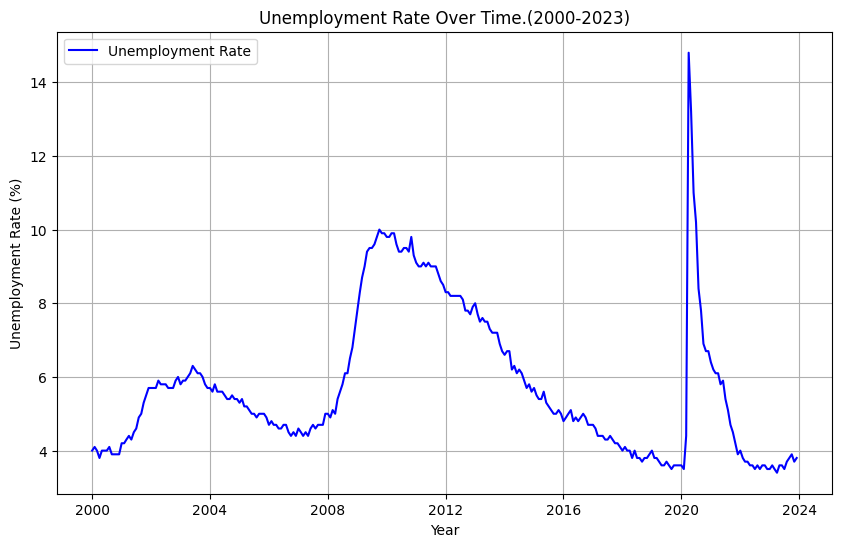

In [280]:
if unemployment_data is not None:
  # Line Plot for unemployment Rate over time
  plt.figure(figsize=(10,6))
  sns.lineplot(data=unemployment_data, x='Date', y='Unemployment_Rate', label='Unemployment Rate', color='blue')
  plt.title('Unemployment Rate Over Time.(2000-2023)')
  plt.xlabel('Year')
  plt.ylabel('Unemployment Rate (%)')
  plt.legend()
  plt.grid()
  plt.show()

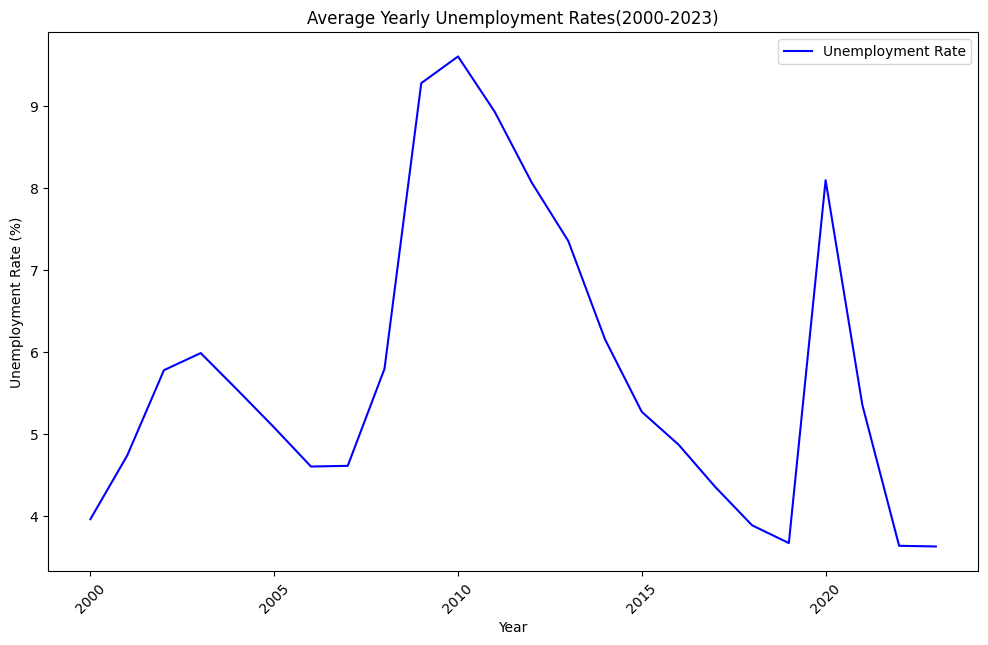

In [286]:
# Aggregating Data by Year for Yearly Trends
yearly_data = unemployment_data.groupby("Year")["Unemployment_Rate"].mean().reset_index()

# Line Plot of Average Yearly Unemployment Rates
plt.figure(figsize=(12,7))
sns.lineplot(data=yearly_data, x='Year', y='Unemployment_Rate', label='Unemployment Rate', color='blue')
plt.title('Average Yearly Unemployment Rates(2000-2023)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

### 5. Analysis

#### Description

* The mean, maximum, and minimum unemployment rates are calculated to understand the overall range of the data.

* The date of highest and lowest unemployment rates are identied to highlight critical periods in the economy.

* This analysis helps identify the most volatile years and how the unemployment rate fluctuates over time.

The goal of this part is to interpret the visualisations and summarise key insights from the data, enabling us to make informed statements
about the trends in unemployment over the given period

In [290]:
if unemployment_data is not None:
  # Identifying trends: Mean, max, and min unemployment rates over years
  mean_rate = unemployment_data['Unemployment_Rate'].mean()
  max_rate = unemployment_data['Unemployment_Rate'].max()
  min_rate = unemployment_data['Unemployment_Rate'].min()

  print("\nAnalysis Results:")
  print(f"\nMean Unemployment Rate: {mean_rate:.2f}%")
  print(f"Maximum Unemployment Rate: {max_rate:.2f}%")
  print(f"Minimum Unemployment Rate: {min_rate:.2f}%")

  # Highliting years with highest and lowest unemployment
  highest_date = unemployment_data.loc[unemployment_data['Unemployment_Rate'].idxmax()]
  lowest_date = unemployment_data.loc[unemployment_data['Unemployment_Rate'].idxmin()]

  print(f"\nYear with Highest Unemployment Rate: {highest_date['Date'].strftime('%Y-%m')} ({highest_date['Unemployment_Rate']:.2f}%)")
  print(f"Year with Lowest Unemployment Rate: {lowest_date['Date'].strftime('%Y-%m')} ({lowest_date['Unemployment_Rate']:.2f}%)")


Analysis Results:

Mean Unemployment Rate: 5.76%
Maximum Unemployment Rate: 14.80%
Minimum Unemployment Rate: 3.40%

Year with Highest Unemployment Rate: 2020-04 (14.80%)
Year with Lowest Unemployment Rate: 2023-04 (3.40%)


### 6. Conclusion

After analysing the data and visualising the trends, the final step is to summarise the findings. This will provide us with a concise overview of the key insights from the data.

In [295]:
# 6. Conclusion
if unemployment_data is not None:
  print('\nConclusion')
  print(f"The unemployement rate data from 2000 to 2023 shows a fluctuation between {min_rate:.2f}% and {max_rate:.2f}% with an average rate of {mean_rate:.2f}")
  print("This analysis highlights key trends and potential areas of concern for policymakers.")


Conclusion
The unemployement rate data from 2000 to 2023 shows a fluctuation between 3.40% and 14.80% with an average rate of 5.76
This analysis highlights key trends and potential areas of concern for policymakers.


### Summary

in this lesson, we have explored real-world unemployment data from the Federal Reserve Economic Data (FRED) database using Python.
* We started by importing the necessary libraries for data manipulation and visualisation, then fetched the unemployment data for the years
2000 to 2023.

* After cleaning the data and preparing it for analysis, we created various visualisations, including a line plot to track the unemployment rate over time and a bar plot to show yearly averages.

* Next, we analysed key statistics, such as the mean, highest, and lowest unemployment rates, and identied the dates of the most extreme unemployment levels.

* Finally, we concluded the lesson with a summary of the trends, helping us to grasp the uctuations in the unemployment rate over the past two decades.
